<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Climate

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

### Data Sets Used

Data sets selected are:

* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum): Monthly mean daily minimum temperature, as recorded at Changi Climate Station.


* [Total Household Electricity Consumption by Dwelling Type](https://www.ema.gov.sg/resources/singapore-energy-statistics/chapter3): Monthly mean household electricity consumption in GWh for each dwelling type (e.g. public housing, private housing, etc). For this analysis, I considered the overall monthly household electricity consumption across all dwelling types.

## Problem Statement

You are an analyst with **Cooling Singapore**, a multi-disciplinary research group who is working on understanding and developing solutions for urban heat issues. You are presenting your preliminary research on temperature change and household electricity use from Jan 2005-Jun 2022.

**Your research questions are**:
1. How have temperatures and household electricity use changed ***over time***?
2. How do high temperatures affect household electricity use ***within the year***? 

### Outside Research

Air-conditioning is popular for its ability to cool spaces rapidly. However, waste heat is generated in the cooling process. This waste heat can add up to 11 degrees Celcius to ambient temperatures, farther driving up demand for air-conditioning use, creating a self-perpetuating cycle.

In Singapore, it was observed that the rising temperatures experienced in 2022 led to increased demand for installation of air-conditioning units. Air-conditioning was also identified as a major contributor (24%) to household electricity use.

**Sources**:
- https://kontinentalist.com/stories/air-conditioning-in-southeast-asia-is-worsening-climate-change
- https://www.channelnewsasia.com/singapore/aircon-sales-servicing-companies-retailers-strong-demand-2709076
- https://www.nea.gov.sg/our-services/climate-change-energy-efficiency/energy-efficiency/household-sector/household-electricity-consumption-profile

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Creating a list of numbers
test_set = [1,23,503,45,87,9,234,29,50,18]

# Calculating mean by dividing total sum over total number of values in the test set
def calc_mean(list_num):
    return sum(list_num)/len(list_num)

# Printing output of mean function
print(f"The mean of the test set of numbers is {calc_mean(test_set)}.")

The mean of the test set of numbers is 99.9.


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
def std_dev (list_num):
    
    # Calculating mean
    mean = calc_mean(list_num)
    
    # Calculating squared deviations for each point in the data set
    squared_devs = [(x-mean)**2 for x in list_num]
        
    # Calculating variance by finding average of squared deviations
    variance = calc_mean(squared_devs)
    
    # Calculating standard deviation by taking square root of variance
    return variance**0.5

# Printing output of standard deviation function
print(f"The standard deviation of the test set of numbers is {round(std_dev(test_set),2)}.")

The standard deviation of the test set of numbers is 148.94.


--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #importing pyplot to use subplot for plotting dual axes later
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

### 1. Importing and Displaying Data Sets

In [4]:
# Importing datasets

temp_monthly = pd.read_csv('../data/surface-air-temperature-monthly-mean.csv')
elect_use_monthly = pd.read_csv('../data/TotalHouseholdElectricity ConsumptionbyDwellingType.csv')

In [5]:
# Printing first five rows of mean_temp
temp_monthly.head() 

,month,mean_temp
0,1982-01,25.9
1,1982-02,27.1
2,1982-03,27.2
3,1982-04,27.0
4,1982-05,28.0


In [6]:
# Printing first five rows of monthly_electricity_consumption
elect_use_monthly.head()

,year,month,DWELLING_TYPE,consumption_GWh,Unnamed: 4
0,2005,1,Overall,447.8,NaN
1,2005,2,Overall,437.1,NaN
2,2005,3,Overall,479.7,NaN
3,2005,4,Overall,533.6,NaN
4,2005,5,Overall,535.0,NaN


### 2a. Data Cleaning - Mean Monthly Min Temperature

In [7]:
# Checking temp_monthly for data types and null values
# There are no null values
# Month (yyyy-mm) format is displayed as object
temp_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   month      491 non-null    object 
 1   mean_temp  491 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


### 2b. Data Cleaning -  Mean Monthly Household Electricity Consumption

In [8]:
# Checking elect_use_monthly for data types and null values
# There is an empty column and 2 rows with null values
elect_use_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             2281 non-null   object 
 1   month            2280 non-null   object 
 2   DWELLING_TYPE    2280 non-null   object 
 3   consumption_GWh  2280 non-null   float64
 4   Unnamed: 4       0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 89.3+ KB


In [9]:
# Removing empty column
elect_use_monthly.drop(['Unnamed: 4'], axis=1, inplace=True)

# Removing null values in rows
clean_elect_use_monthly = elect_use_monthly.dropna(axis=0)

In [10]:
# Checking data values in in column ['year']
print(clean_elect_use_monthly['year'].unique())

# Checking data values in in column ['month']
print(clean_elect_use_monthly['month'].unique())

['2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022']
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' 'Annual']


In [11]:
# Removing rows with consolidated values for monthly household electrity consumption
# Removing all rows with mean annual household electricity consumption

rows_with_annual = clean_elect_use_monthly[clean_elect_use_monthly['month'].str.contains('Annual', case=False)]

rows_to_drop = list(rows_with_annual.index)

clean_elect_use_monthly.drop(rows_to_drop,inplace=True)

/var/folders/jz/qcwfx1nj09v3vnhrlf56x74c0000gn/T/ipykernel_3794/3838639393.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_elect_use_monthly.drop(rows_to_drop,inplace=True)


In [12]:
# Converting string in columns ['year'] and ['month'] to digits
clean_elect_use_monthly['year'] = clean_elect_use_monthly['year'].astype(int)
clean_elect_use_monthly['month'] = clean_elect_use_monthly['month'].astype(int)


/var/folders/jz/qcwfx1nj09v3vnhrlf56x74c0000gn/T/ipykernel_3794/3141300128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_elect_use_monthly['year'] = clean_elect_use_monthly['year'].astype(int)
/var/folders/jz/qcwfx1nj09v3vnhrlf56x74c0000gn/T/ipykernel_3794/3141300128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_elect_use_monthly['month'] = clean_elect_use_monthly['month'].astype(int)


In [13]:
# There are no null values remaining in the data set. Digits are stored as integers instead of string.
clean_elect_use_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 0 to 2269
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             2100 non-null   int64  
 1   month            2100 non-null   int64  
 2   DWELLING_TYPE    2100 non-null   object 
 3   consumption_GWh  2100 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 82.0+ KB


### 3a. Data Selection - Mean Monthly Min Temperature

In [14]:
# There is no household electricity consumption data before 2005
# Removing temperature data before 2005 given the lack of household electricity consumption data for comparison

rows_to_drop = list(range(0,276))

temp_monthly.drop(rows_to_drop, inplace=True)

In [15]:
# The columm 'month' reflects the date in YYYY-MM format
# Renaming column before splitting text to columns to avoid duplicate keys
temp_monthly.rename(columns={'month': 'date'}, inplace=True)

# Creating match key by splitting date into 'year'and 'month' format
temp_monthly[['year','month']] = temp_monthly['date'].str.split("-", n = 1, expand = True)

In [16]:
# Removing unused column 'date'
temp_monthly.drop(['date'], axis=1, inplace=True)

# Converting string in columns ['year'] and ['month'] to digits
temp_monthly['year'] = temp_monthly['year'].astype(int)
temp_monthly['month'] = temp_monthly['month'].astype(int)

# Re-arranging columns in desired order
temp_monthly[['year','month','mean_temp']]

# Re-setting index for data merge
temp_monthly.reset_index(drop=True)

,mean_temp,year,month
0,26.6,2005,1
1,28.5,2005,2
2,28.5,2005,3
3,28.7,2005,4
4,28.5,2005,5
...,...,...,...
210,28.6,2022,7
211,28.1,2022,8
212,27.9,2022,9
213,27.6,2022,10


### 3b. Data Selection - Mean Monthly Household Electricity Consumption

In [17]:
# Data set contains household electricity consumption for multiple dwelling types and overall consumption across all dwelling types
# Extracting data for overall consumption across all dwelling types
overall_elect_monthly = clean_elect_use_monthly[clean_elect_use_monthly['DWELLING_TYPE'] == 'Overall']

In [18]:
# All data is now from same dwelling type ('Overall')
# Dropping column indicating different dwelling types
overall_elect_monthly.drop(['DWELLING_TYPE'], axis=1, inplace=True)

# Renaming columns to reflect overall household electricity consumption across all dwelling types
overall_elect_monthly.rename(columns={'consumption_GWh': 'mean_overall_elect_use'}, inplace=True)

/var/folders/jz/qcwfx1nj09v3vnhrlf56x74c0000gn/T/ipykernel_3794/2375870121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_elect_monthly.drop(['DWELLING_TYPE'], axis=1, inplace=True)
/var/folders/jz/qcwfx1nj09v3vnhrlf56x74c0000gn/T/ipykernel_3794/2375870121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_elect_monthly.rename(columns={'consumption_GWh': 'mean_overall_elect_use'}, inplace=True)


In [19]:
# Checking table output
overall_elect_monthly.head()

,year,month,mean_overall_elect_use
0,2005,1,447.8
1,2005,2,437.1
2,2005,3,479.7
3,2005,4,533.6
4,2005,5,535.0


### 4. Merging Data on Mean Monthly Min Temperature and Mean Monthly Household Electricity Consumption

In [40]:
# Merging both tables using a match key
combined = pd.merge(temp_monthly, overall_elect_monthly, on=['year', 'month'])

# Re-arranged columns in order
combined = combined[['year', 'month', 'mean_temp', 'mean_overall_elect_use']]

# Saved cleaned and merged data to CSV
combined.to_csv('cleaned_temperature_overall_elect.csv')

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

#### Data Dictionary of the Mean Monthly Min Temperature and Mean Monthly Household Electricity Consumption:

An overview for the merged datasets on temperature and household electricity consumption for **Jan 2005 - Jun 2022**:

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**mean_temp**|*float*|National Environment Agency data| Mean monthly minimum temperature recorded. Units are in degrees Celcius.| 
|**mean_overall_elect_use**|*float*|Energy Market Authority data| Mean monthly household electricity consumption across all dwelling types. Units are in Gigawatts per hour (GWh)| 

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [21]:
# Creating summary statistics for merged dataset

combined.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,210.0,2013.257143,5.068013,2005.0,2009.0,2013.00,2018.000,2022.0
month,210.0,6.414286,3.459234,1.0,3.0,6.00,9.000,12.0
mean_temp,210.0,27.890000,0.728402,26.0,27.3,27.95,28.400,29.4
mean_overall_elect_use,210.0,580.348095,75.728514,437.1,524.5,572.85,631.775,885.0


In [22]:
# Applying standard deviation to each numeric column in the merged dataset

sd = {col: std_dev(combined[col]) for col in ['mean_temp', 'mean_overall_elect_use']}

print(sd)

{'mean_temp': 0.7266655744858548, 'mean_overall_elect_use': 75.5479930790795}


**EDA Q1.** Which months have the highest and lowest min temperatures in 2005, 2010, 2015 and 2022?

In [23]:
# Creating new dataframe with only the target years
filtered = combined[combined['year'].isin([2005,2010,2015,2022])]

# Grouping values by year, finding the index for maximum temperature in each year 
max_temp_mths = filtered.groupby(['year'])['mean_temp'].idxmax()

# Displaying year, month, and mean temp for max temps identified
filtered.loc[max_temp_mths, ['year', 'month', 'mean_temp']]

,year,month,mean_temp
5,2005,6,28.8
64,2010,5,29.2
126,2015,7,29.1
208,2022,5,29.2


In [24]:
# Grouping values by year, finding the index for min temperature in each year 
min_temp_mths = filtered.groupby(['year'])['mean_temp'].idxmin()

# Displaying year, month, and mean temp for min temps identified
filtered.loc[min_temp_mths, ['year', 'month', 'mean_temp']]

,year,month,mean_temp
0,2005,1,26.6
71,2010,12,26.8
120,2015,1,26.9
205,2022,2,27.3


**EDA Q2.** Which year have the highest and lowest min temperature in the date range of analysis?

In [25]:
# Retrieving highest mean min temp by sorting list of temperatures in ascending order
max_temp = combined.sort_values('mean_temp', ascending=False).iloc[0]
print(f"In the date range of analysis, the highest mean minimum temperature was {max_temp['mean_temp']} degrees celcius. It occurred in {round(max_temp['year'])}.")

# Retrieving lowest mean min temp by sorting list of temperatures in descending order
min_temp = combined.sort_values('mean_temp', ascending=True).iloc[0]
print(f"In the date range of analysis, the lowest mean minimum temperature was {min_temp['mean_temp']} degrees celcius. It occurred in {round(min_temp['year'])}.")

In the date range of analysis, the highest mean minimum temperature was 29.4 degrees celcius. It occurred in 2016.
In the date range of analysis, the lowest mean minimum temperature was 26.0 degrees celcius. It occurred in 2021.


**EDA Q3**. Which month have the highest and lowest overall household electricity consumption in 2005, 2010, 2015 and 2022?

In [26]:
# Grouping values by year, finding the index for max overall houehold elect use in each year 
max_elect_mths = filtered.groupby(['year'])['mean_overall_elect_use'].idxmax()

# Displaying year, month, and elect use for months with max elect use
filtered.loc[max_elect_mths, ['year', 'month', 'mean_overall_elect_use']]

,year,month,mean_overall_elect_use
5,2005,6,560.2
65,2010,6,606.0
127,2015,8,656.7
209,2022,6,721.7


In [27]:
# Grouping values by year, finding the index for min overall houehold elect use in each year 
min_elect_mths = filtered.groupby(['year'])['mean_overall_elect_use'].idxmin()

# Displaying year, month, and elect use for months with max elect use
filtered.loc[min_elect_mths, ['year', 'month', 'mean_overall_elect_use']]

,year,month,mean_overall_elect_use
1,2005,2,437.1
60,2010,1,490.6
121,2015,2,493.6
206,2022,3,621.4


**EDA Q4.** Which year have the highest and lowest overall household electricity consumption in the date range of analysis?

In [28]:
# Retrieving highest mean elect use by sorting elect use values in ascending order
max_elect = combined.sort_values('mean_overall_elect_use', ascending=False).iloc[0]
print(f"In the date range of analysis, the highest overall household electricity use was {max_elect['mean_overall_elect_use']} GWh. It occurred in {round(max_elect['year'])}.")

# Retrieving lowest mean elect use by sorting elect use values in descending order
min_elect = combined.sort_values('mean_overall_elect_use', ascending=True).iloc[0]
print(f"In the date range of analysis, the lowest overall household electricity use was {min_elect['mean_overall_elect_use']} GWh. It occurred in {round(min_elect['year'])}.")

In the date range of analysis, the highest overall household electricity use was 885.0 GWh. It occurred in 2020.
In the date range of analysis, the lowest overall household electricity use was 437.1 GWh. It occurred in 2005.


**EDA Q5.** Are there any outlier months in the dataset?

In [29]:
# Displaying min and max values for both mean temp and mean overall elect use in the dataset
combined.describe()[['mean_temp','mean_overall_elect_use']].transpose()

,count,mean,std,min,25%,50%,75%,max
mean_temp,210.0,27.890000,0.728402,26.0,27.3,27.95,28.400,29.4
mean_overall_elect_use,210.0,580.348095,75.728514,437.1,524.5,572.85,631.775,885.0


In [30]:
# Creating function to find outliers
def IQR_values(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = abs(Q1 - Q3)
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    return {'lower bound': round(lower_lim,2), 'upper bound':round(upper_lim,2)}

# Finding upper and lower bound for mean temp
# No outliers. Range of mean temp falls within upper and lower bound.
print(IQR_values(combined,'mean_temp'))

{'lower bound': 25.65, 'upper bound': 30.05}


In [31]:
# Finding upper and lower bound for mean overall elect use

print(IQR_values(combined,'mean_overall_elect_use'))
upper_bound_elect =IQR_values(combined,'mean_overall_elect_use')['upper bound']

{'lower bound': 363.59, 'upper bound': 792.69}


In [32]:
# Boolean masking to filter values above upper bound for overall household electricity use

print(combined[combined['mean_overall_elect_use']>upper_bound_elect])

print(f"The outlier months for mean overall household electricity use are June 2020 and July 2020.")

     year  month  mean_temp  mean_overall_elect_use
185  2020      6       28.1                   868.1
186  2020      7       27.9                   885.0
The outlier months for mean overall household electricity use are June 2020 and July 2020.


## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


**Viz Q1**. Use Seaborn's heatmap with pandas .corr() to visualize correlations between all numeric features.

Text(0.5, 1.0, 'Correlation between Year, Month, Temperature, and Overall Household Electricity Use')

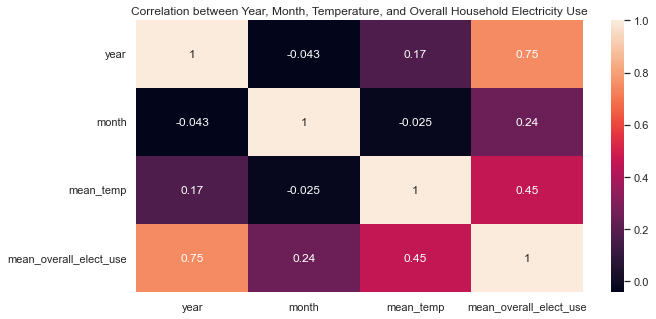

In [33]:
sns.set_theme (rc = {'figure.figsize':(10, 5)})
sns.heatmap(combined.corr(), annot=True)

plt.title('Correlation between Year, Month, Temperature, and Overall Household Electricity Use',fontsize=12)

*Interpretation: Heatmap above shows that there is a strong correlation between year and overall elect use, and moderate correlation between mean temp and overall elect use.*

**Viz Q2a**. Plot line graphs to visualise relationship between mean **monthly** temperature and mean **monthly** overall household electricity use

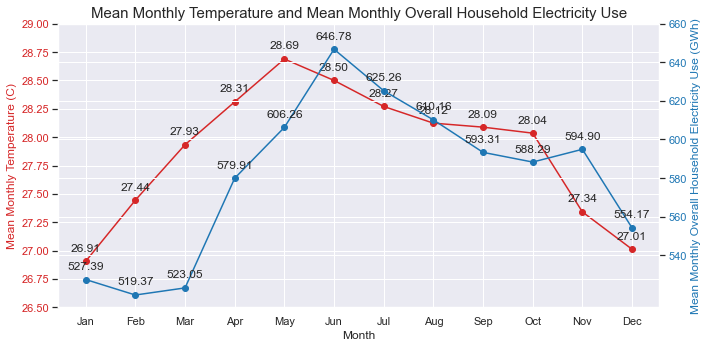

In [34]:
# Plotting mean monthly temperature and mean monthly overall electricity use on a dual-axis graph

# Grouping values for temp and elect use by month
plot_monthly_temp = combined.groupby('month')['mean_temp'].mean()
plot_monthly_elect = combined.groupby('month')['mean_overall_elect_use'].mean()

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Mean Monthly Temperature (C)', color=color)
ax1.plot(plot_monthly_temp, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Adding second y-axis
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Mean Monthly Overall Household Electricity Use (GWh)', color=color)
ax2.plot(plot_monthly_elect, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

for x, y in zip(plot_monthly_temp.index, plot_monthly_temp):
    ax1.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

for x, y in zip(plot_monthly_elect.index, plot_monthly_elect):
    ax2.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

ax1.set_title('Mean Monthly Temperature and Mean Monthly Overall Household Electricity Use', fontsize=15)

# Set x-axis intervals and re-label by month
ax1.set_xticks(list(range(1,13)))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adjusting y-axes to start close to lowest value in dataset
ax1.set_yticks([26.5,26.75,27,27.25,27.5,27.75,28,28.25,28.5,28.75,29])
ax2.set_yticks(list(range(540,670,20)))

fig.tight_layout()
plt.show()

*Interpretation: The graph shows that temperature and household electricity follow the same rise-and-fall pattern throughout the year. Interestingly, there is an approx. 1 month lag time before household electricity use catches up with changes in temperature.*

**Viz Q2b**. Plot line graphs to visualise relationship between mean **annual** temperature and mean **annual** overall household electricity use

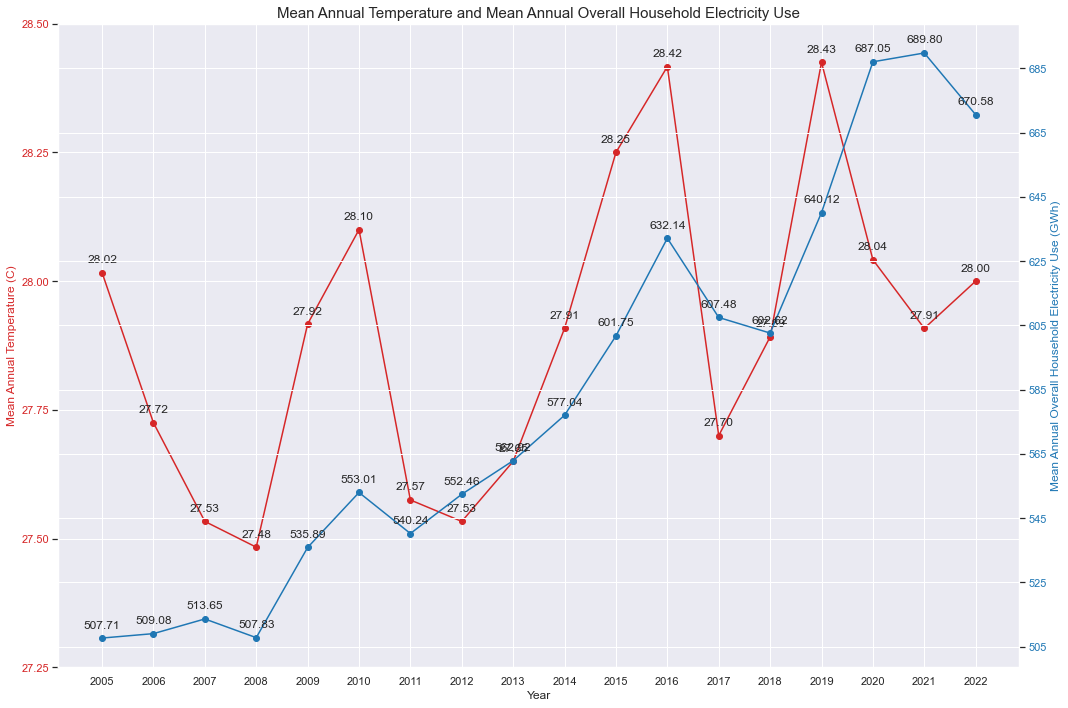

In [35]:
# Plotting mean annual temperature and mean monthly overall electricity use on a dual-axis graph

# Grouping values for temp and elect use by year
plot_annual_temp = combined.groupby('year')['mean_temp'].mean()
plot_annual_elect = combined.groupby('year')['mean_overall_elect_use'].mean()

fig, ax1 = plt.subplots(figsize=(15,10))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Annual Temperature (C)', color=color)
ax1.plot(plot_annual_temp, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Adding second y-axis
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Mean Annual Overall Household Electricity Use (GWh)', color=color)
ax2.plot(plot_annual_elect, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

for x, y in zip(plot_annual_temp.index, plot_annual_temp):
    ax1.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

for x, y in zip(plot_annual_elect.index, plot_annual_elect):
    ax2.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

ax1.set_title('Mean Annual Temperature and Mean Annual Overall Household Electricity Use',fontsize=15)

# Set x-axis intervals and re-label by year in integer
ax1.set_xticks(list(range(2005,2023)))

# Adjusting y-axes to start close to lowest value in dataset
ax1.set_yticks([27.25,27.5,27.75,28,28.25,28.5])
ax2.set_yticks(list(range(505,690,20)))

fig.tight_layout()
plt.show()

*Interpretation: The graph shows that the mean min temperature has increased in the past 20 years, albeit with cyclical fluctuations which is due to seasonal weather patterns (e.g. El Nino, La Nina). In contrast, the mean overall household use has sharply increased in the past 20 years.*

*The lowest values for temperature and electricity use occurred about 15 years ago. In contrast, while the highest values for temperature and electricity use occurred recently in the past 6 years*

*The range of increase for electricity use is significantly steeper than that of temperature increase. For an approx 1C increase in temperature from 27.5C to 28.4C, there is 36% increase in household electricity use from 507.7 GWh to 689.8 GWh*

**Viz Q4**. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.

<AxesSubplot:title={'center':'Relationship Between Mean Min Temp and Mean Overall Electricity Use from Jan 2005-Jun 2022'}, xlabel='Mean Temp (C)', ylabel='Mean Overall Household Electricity Use (GWh)'>

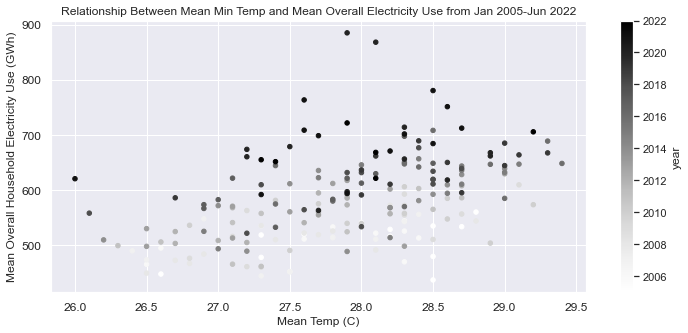

In [36]:
# Plotting temperature as independent var, electricity use as dependent var
# Mean overall household electricity use increases as mean temp increases
# As shown by darker dots, household electricity use is higher in more recent years

combined.plot(kind='scatter',x='mean_temp', y='mean_overall_elect_use', c='year', 
              title='Relationship Between Mean Min Temp and Mean Overall Electricity Use from Jan 2005-Jun 2022',
              xlabel='Mean Temp (C)',
              ylabel='Mean Overall Household Electricity Use (GWh)',
              sharex=False,
             figsize=(12, 5),
             fontsize=12)

*Interpretation: The scatter plot shows that electricity use tends to increase as temperature increases. There is a positive correlation between temperature and electricity use. As shown by the darker dots clustering at the top and right of the plot, there has been a general increase in electricity use and temperature in recent years*

**Viz Q5a**. Visualise the spread of mean min temperature by month and year using a heatmap

Text(0.5, 1.0, 'Heatmap of Mean Min Temperature in Celcius (Jan 2005-Jun 2022)')

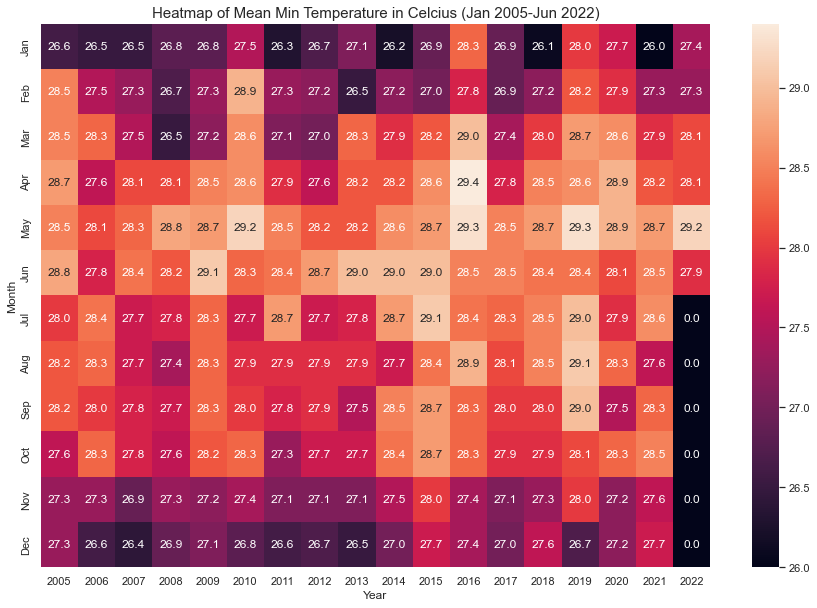

In [37]:
# Visualising distribution of mean temperatures across the years
# Months with higher temperatures are displayed in lighter colours

sns.set_theme (rc = {'figure.figsize':(15, 10)})
sns.set(font_scale=1)

pt_mean_monthly_temp = combined.pivot(index='month', columns='year', values='mean_temp').fillna(0).astype(float)

heatmap_temp = sns.heatmap(pt_mean_monthly_temp, annot=True, fmt=".1f", vmin=26,
                          yticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
heatmap_temp.set_xlabel("Year")
heatmap_temp.set_ylabel("Month")

plt.title('Heatmap of Mean Min Temperature in Celcius (Jan 2005-Jun 2022)',fontsize=15)

*Interpretation: The heatmap shows that the months of May and June tend to be hotter, as indicated by the lighter colours. In contrast, the months of Nov to Feb tend to be cooler, as indicated by the darker colours. However, these cooler months are getting hotter throughout the years, as seen by the increase in lighter colours from 2015 onwards*

**Viz Q5b.** Visualise the spread of mean overall household electricity use by month and year using a heatmap

Text(0.5, 1.0, 'Heatmap of Mean Overall Household Electricity Use in GWh (Jan 2005-Jun 2022)')

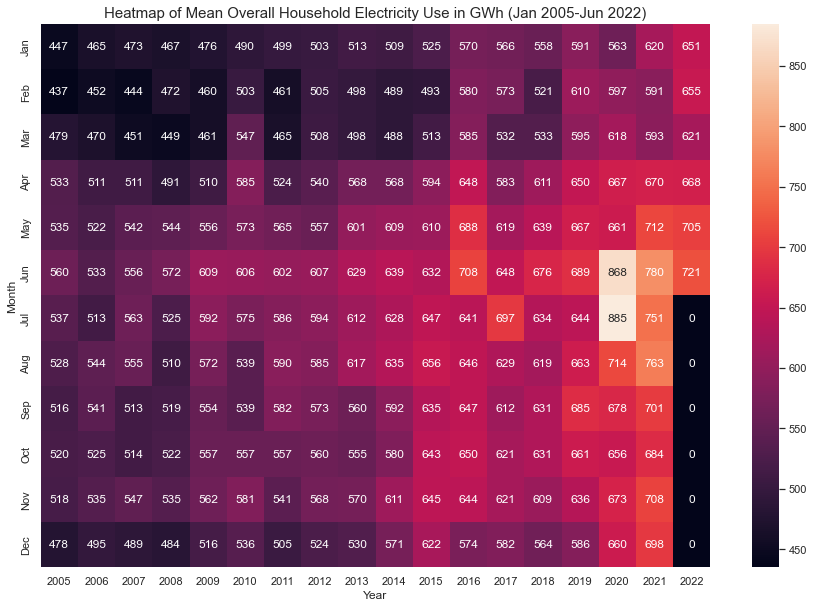

In [38]:
# Visualising mean overall household elect use across the years
# Months with higher overall elect use are displayed in lighter colours
# Outlier months are June 2020 and July 2020

sns.set_theme (rc = {'figure.figsize':(15, 10)})
sns.set(font_scale=1)

pt_mean_monthly_elec = combined.pivot(index='month', columns='year', values='mean_overall_elect_use').fillna(0).astype(int)

heatmap_elect = sns.heatmap(pt_mean_monthly_elec, annot=True, fmt="0", vmin=435, 
                            yticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
heatmap_elect.set_xlabel("Year")
heatmap_elect.set_ylabel("Month")

plt.title('Heatmap of Mean Overall Household Electricity Use in GWh (Jan 2005-Jun 2022)',fontsize=15)

*Interpretation: The heatmap shows that household electricity use has increased over the years, as seen by the colour contrast from left to right of the chart. Generally, electricity use seems to have picked up sharply from year 2015 onwards. Household electricity use seems to be highest from May to June, and lowest from Nov to Mar.*

*The months of June 2020 and July 2020 stand out as clear outliers of high household electricity use. Note that higher household electricity use tended to be seen in months of June and July. This was likely exacerbated in 2020 due to the COVID-19 Circuit Breaker and work-from-home orders in those months.*

## Conclusions and Recommendations

The analysis of mean minimum temperature and mean overall household electricity use uncovered that:
1. Over time, there is an overall increase for both temperatures and household electricity use
2. Within the calendar year, temperature and household electricity follow similar seasonal patterns - i.e. lower electricity use within cooler months of Jan/Feb, higher electricity use within hotter months of May/Jun
3. There is a moderate positive correlation between temperature and household electricity use. The correlation score is 0.45

Given that temperature affects electricity use, we recommend exploring low energy cooling solutions to deal with the tropical heat, including:

1. Building natural shading structures to block sun's heat
    - Rather than artifically cooling rooms through air-conditioning, we could explore building shade structures near windows that get heavy sunlight. This will prevent the sun's rays from reaching and heating up the room. 
2. Planting trees to naturally reduce surface temperatures
    - The presence of trees and vegetation lowers the recorded surface temperatures in an urban setting. Neighbourhoods with dense greenery have been observed to be 3 to 7 degrees Celcius cooler than heavily built up areas.
    
**Sources**
- https://kontinentalist.com/stories/air-conditioning-in-southeast-asia-is-worsening-climate-change
- https://kontinentalist.com/stories/who-trees-dont-shield-from-the-urban-heat-island-effect